In [678]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import networkx as nx
from mlxtend.frequent_patterns import fpgrowth, association_rules, apriori
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPRegressor
from statsmodels.stats.moment_helpers import cov2corr
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np


# Задание 1 «Поиск ассоциативных правил»

#### 1. Загрузите файл «assc_TRANSACTION.csv». В нем три колонки Customer – ID клиента, Product – покупка, Time – временная метка (для задания не нужна). Определите (написав соответствующий код) сколько различных значений принимают переменныеProduct и Customer.

In [679]:
data_original = pd.read_csv('TRANSACTION.csv')
unique_products=len(data_original.PRODUCT.unique())
unique_customers = len(data_original.CUSTOMER.unique())
unique_products,unique_customers

(20, 1001)

#### 2. Найдите частые эпизоды с ограничением на размер правила равным 4, с использованием алгоритма и порога на поддержку согласно вашему варианту. (Вариант 1 Apriori, 2%)

Составим таблицу, где столбцами будет имена продуктов, а строками ID покупателей, в ячейках будут булевы значения с информацией о том покупал человек товар или нет

In [680]:
data = data_original.drop(columns='TIME')
basket = data.pivot_table(index='CUSTOMER', columns='PRODUCT', aggfunc=lambda x: True, fill_value=False)
basket

PRODUCT,apples,artichok,avocado,baguette,bordeaux,bourbon,chicken,coke,corned_b,cracker,ham,heineken,hering,ice_crea,olives,peppers,sardines,soda,steak,turkey
CUSTOMER,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,True,False,False,True,False,True,False,True,True,True,False,False,False,False,True
1,False,False,False,True,False,False,False,False,True,True,False,True,True,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True
3,False,False,False,False,False,True,False,True,False,False,True,False,False,True,True,True,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,False,True,True,False,False,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False
997,True,False,False,True,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,True
998,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False,False,True,True,False,False


Отберем частые эпизоды

In [681]:
min_support = 0.02
frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.313686,(apples)
1,0.304695,(artichok)
2,0.362637,(avocado)
3,0.391608,(baguette)
4,0.073926,(bordeaux)
...,...,...
1096,0.022977,"(soda, steak, heineken, hering, cracker)"
1097,0.020979,"(apples, avocado, heineken, artichok, hering, ..."
1098,0.021978,"(soda, avocado, heineken, hering, baguette, cr..."
1099,0.021978,"(coke, bourbon, sardines, heineken, chicken, i..."


Отберем правила с размером <=4

In [682]:
frequent_itemsets_len4 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) <= 4)]
frequent_itemsets_len4

,support,itemsets
0,0.313686,(apples)
1,0.304695,(artichok)
2,0.362637,(avocado)
3,0.391608,(baguette)
4,0.073926,(bordeaux)
...,...,...
1045,0.029970,"(ice_crea, ham, turkey, olives)"
1046,0.042957,"(soda, olives, heineken, hering)"
1047,0.022977,"(soda, steak, heineken, hering)"
1048,0.022977,"(ice_crea, turkey, hering, olives)"


#### 3. Найдите самый большой (где больше всего элементов) частый эпизод, содержащий продукт согласно вашему варианту. Какая у него поддержка? 
Вариант 3 - bourbon

In [683]:
filtered_freq = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: 'bourbon' in x)]
largest_episode = filtered_freq.loc[filtered_freq['itemsets'].apply(len).idxmax()]
largest_episode['support'],largest_episode['itemsets']

(0.02197802197802198,
 frozenset({'bourbon', 'chicken', 'coke', 'heineken', 'ice_crea', 'sardines'}))

#### 4. На основе найденных частых эпизодов постройте ассоциативные правила с порогом на достоверность согласно вашему варианту. Найдите правило с максимальным лифтом, содержащем продукт из вашего варианта в левой части правила. Дайте ему письменную словесную интерпретацию, укажите и объясните его числовые показатели: поддержку, достоверность и подъем.
50% согласно варианту

Сформируем правило

In [684]:
min_confidence = 0.3
rules_by_conf = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)
rules_by_conf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(apples),(avocado),0.313686,0.362637,0.138861,0.442675,1.220710,1.0,0.025107,1.143611,0.263443,0.258364,0.125577,0.412798
1,(avocado),(apples),0.362637,0.313686,0.138861,0.382920,1.220710,1.0,0.025107,1.112196,0.283677,0.258364,0.100878,0.412798
2,(apples),(baguette),0.313686,0.391608,0.146853,0.468153,1.195462,1.0,0.024011,1.143922,0.238234,0.262970,0.125814,0.421576
3,(baguette),(apples),0.391608,0.313686,0.146853,0.375000,1.195462,1.0,0.024011,1.098102,0.268747,0.262970,0.089338,0.421576
4,(apples),(corned_b),0.313686,0.390609,0.150849,0.480892,1.231132,1.0,0.028320,1.173918,0.273548,0.272563,0.148152,0.433540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,"(heineken, hering, bourbon)","(soda, olives, cracker)",0.062937,0.125874,0.023976,0.380952,3.026455,1.0,0.016054,1.412049,0.714552,0.145455,0.291810,0.285714
3240,"(hering, olives, bourbon)","(soda, heineken, cracker)",0.062937,0.233766,0.023976,0.380952,1.629630,1.0,0.009263,1.237762,0.412313,0.087912,0.192090,0.241758
3241,"(cracker, hering, bourbon)","(soda, heineken, olives)",0.052947,0.126873,0.023976,0.452830,3.569158,1.0,0.017258,1.595715,0.760065,0.153846,0.373322,0.320903
3242,"(olives, heineken, hering)","(soda, cracker, bourbon)",0.078921,0.135864,0.023976,0.303797,2.236039,1.0,0.013253,1.241213,0.600145,0.125654,0.194337,0.240134


Найдем правило с максимальным лифтомс продуктом bourbon

In [685]:
filtered_rbc = rules_by_conf[rules_by_conf['antecedents'].apply(lambda x:'bourbon' in x)]
best_rule = filtered_rbc.loc[filtered_rbc['lift'].idxmax()]
best_rule

antecedents           (ice_crea, olives, bourbon)
consequents                        (turkey, coke)
antecedent support                       0.107892
consequent support                       0.118881
support                                  0.093906
confidence                                0.87037
lift                                     7.321351
representativity                              1.0
leverage                                  0.08108
conviction                               6.797203
zhangs_metric                            0.967835
jaccard                                  0.706767
certainty                                0.852881
kulczynski                               0.830143
Name: 2961, dtype: object

+ Support = 0.098901, это частота, с которой встречаются левая и правая части правила одновременно (A∪B) внутри общего числа транзакция (A∪B/общее число транзакций), то есть в 9.8% корзин содержатся все товары
+ Confidence = 0.733333, это вероятность с которой купят B, при условии покупки A, то есть Support(A∪B)/Support(A), 73% что при покупке (baguette, bourbon) купят и (avocado, hering, heineken)
+ Lift = 5.478109, эта величина показывает насколько сильно связаны величины A и B, по сравнению со случайными покупками, lift = 5.5 значит, что вероятность купить (avocado, hering, heineken) при покупке (baguette, bourbon) в 5.5 раз выше чем при случаной покупке
-----
 Здесь A (antecedent support) - левая часть правила, B (consequent support) - правая часть правила 

#### 5. Используя только двухместные правила постройте ориентированный граф, где вершины элементы правила, их цвет (или размер) – поддержка элемента (item support), дуги – импликации (ориентированы в направлении от условия к следствию), веса дугu – достоверности.

In [686]:
filtered_rbc_size2 = rules_by_conf[(rules_by_conf['antecedents'].apply(len) == 1) & (rules_by_conf['consequents'].apply(len) == 1)]
filtered_rbc_size2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(apples),(avocado),0.313686,0.362637,0.138861,0.442675,1.220710,1.0,0.025107,1.143611,0.263443,0.258364,0.125577,0.412798
1,(avocado),(apples),0.362637,0.313686,0.138861,0.382920,1.220710,1.0,0.025107,1.112196,0.283677,0.258364,0.100878,0.412798
2,(apples),(baguette),0.313686,0.391608,0.146853,0.468153,1.195462,1.0,0.024011,1.143922,0.238234,0.262970,0.125814,0.421576
3,(baguette),(apples),0.391608,0.313686,0.146853,0.375000,1.195462,1.0,0.024011,1.098102,0.268747,0.262970,0.089338,0.421576
4,(apples),(corned_b),0.313686,0.390609,0.150849,0.480892,1.231132,1.0,0.028320,1.173918,0.273548,0.272563,0.148152,0.433540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,(olives),(steak),0.472527,0.226773,0.145854,0.308668,1.361131,1.0,0.038698,1.118460,0.502997,0.263538,0.105913,0.475920
174,(turkey),(olives),0.282717,0.472527,0.220779,0.780919,1.652642,1.0,0.087188,2.407657,0.550562,0.413084,0.584658,0.624075
175,(olives),(turkey),0.472527,0.282717,0.220779,0.467230,1.652642,1.0,0.087188,1.346328,0.748680,0.413084,0.257239,0.624075
176,(peppers),(sardines),0.295704,0.295704,0.119880,0.405405,1.370982,1.0,0.032439,1.184497,0.384208,0.254237,0.155760,0.405405


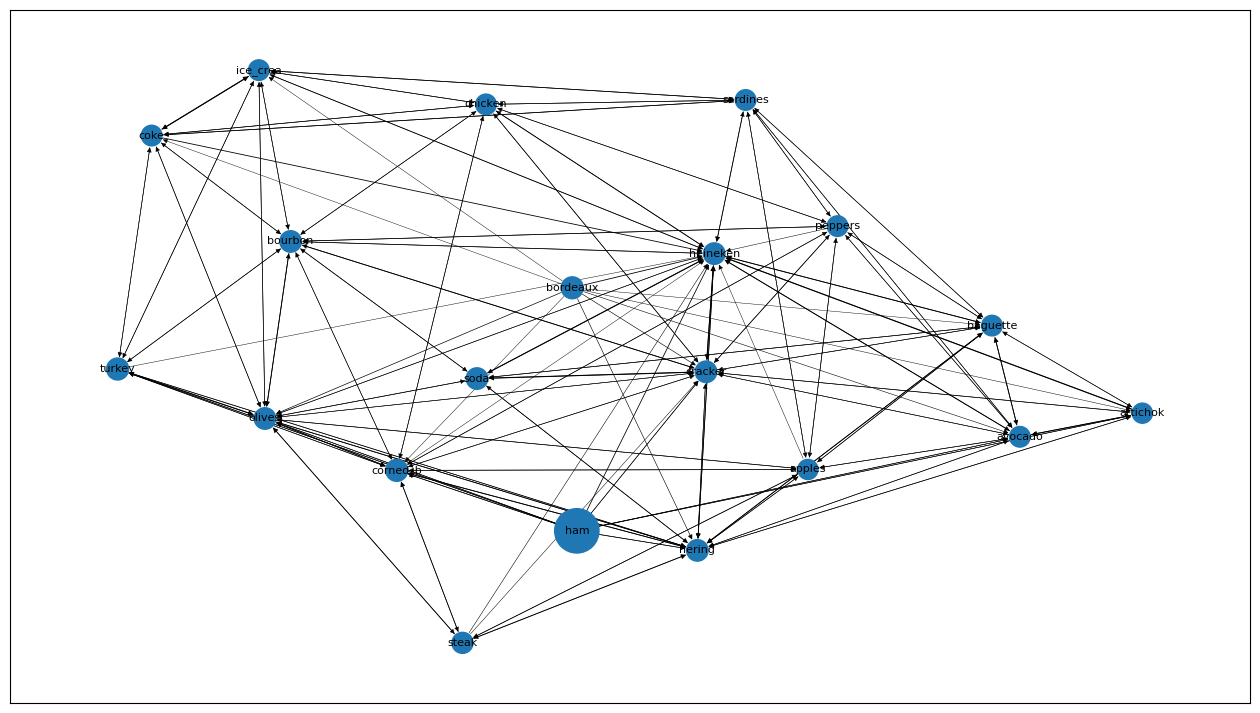

In [687]:
G = nx.DiGraph()
item_support = {item: support for itemset, support in zip(frequent_itemsets['itemsets'], frequent_itemsets['support']) for item in itemset}
for item in item_support:
    G.add_node(item, size=item_support[item] * 10000)
for _, row in filtered_rbc_size2.iterrows():
    A = list(row['antecedents'])[0]
    B = list(row['consequents'])[0]
    confidence = row['confidence']
    G.add_edge(A, B, weight=confidence)
plt.figure(figsize=(16, 9))
pos = nx.spring_layout(G,seed=13)
node_sizes = [G.nodes[node]['size'] for node in G.nodes]
edges = G.edges(data=True)
nx.draw_networkx_nodes(G,pos=pos,node_size=node_sizes)
nx.draw_networkx_edges(G,pos=pos,width=[d['weight'] for (_, _, d) in edges],arrowsize=7)
nx.draw_networkx_labels(G,pos=pos,font_size=8)
plt.show()

#### 6. Для данного графа рассчитайте меры центральности согласно вашему варианту и найдите элемент с самой высокой мерой, а также какую меру имеет продукт из вашего варианта.

Рассчитаем меры центральности для варианта 1 Betweenness

<BarContainer object of 20 artists>

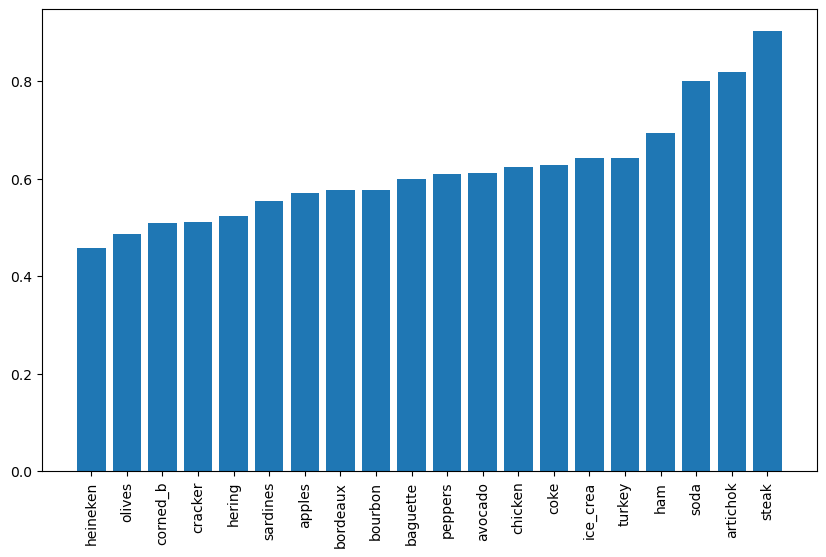

In [688]:
plt.figure(figsize=(10,6))
metr=nx.clustering(G)
metr = dict(sorted(metr.items(), key=lambda x: x[1]))
plt.xticks(rotation = 'vertical')
plt.bar(metr.keys(),metr.values())

Найдем меру bourbon и максимальную меру

In [689]:
metr['bourbon'],list(metr.items())[-1]

(0.5777777777777777, ('steak', 0.9024390243902439))

#### 7. Постройте числовую матрицу со счетчиком числа покупок в ячейках, клиентами по строкам и продуктами по столбцам.

In [690]:
purchase_matrix = data.pivot_table(index='CUSTOMER', columns='PRODUCT', aggfunc='size', fill_value=0)
purchase_matrix

PRODUCT,apples,artichok,avocado,baguette,bordeaux,bourbon,chicken,coke,corned_b,cracker,ham,heineken,hering,ice_crea,olives,peppers,sardines,soda,steak,turkey
CUSTOMER,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0
997,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1
998,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,2,1,0,0


# Задание 2 «Выявление скрытых структур в данных»

#### 8. С помощью метода из вашего варианта постройте линейную проекцию набора данных на плоскость (2 компоненты) цветом укажите транзакции, содержащие продукт  вашего варианта.
PCA согласно варианту

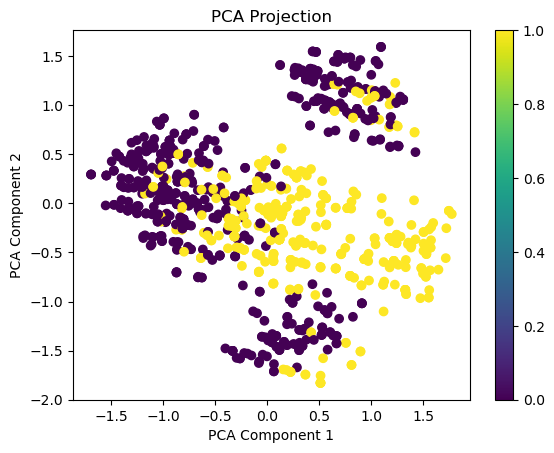

In [691]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(basket)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=basket['bourbon'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection')
plt.colorbar()
plt.show()

#### 9. С помощью метода из вашего варианта постройте нелинейную проекцию набора данных на плоскость цветом укажите транзакции, содержащие продукт из вашего варианта. Не указанные в задании параметры (например, размер решетки для SOM или число слоев в автоэнкодере можно выбирать на свое усмотрение для получение наиболее удобной визуализации). Дайте письменный комментарий, чем с вашей точки зрения для вашего примера лучше или хуже нелинейная проекция.
Согласно варианту AutoEncoder

In [692]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

X = purchase_matrix.values.astype('float32')


In [693]:
input_dim = X.shape[1]

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(16, activation='relu')(encoded)
bottleneck = layers.Dense(2, activation='linear')(encoded)  # 2D

decoded = layers.Dense(16, activation='relu')(bottleneck)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(64, activation='relu')(decoded)
output_layer = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
encoder = models.Model(inputs=input_layer, outputs=bottleneck)  # для извлечения 2D

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(purchase_matrix, purchase_matrix,
                epochs=60,
                batch_size=40,
                shuffle=True,
                validation_split=0.2,
                verbose=1)

X_2d = encoder.predict(X)

Epoch 1/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6869 - val_loss: 0.6553
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6394 - val_loss: 0.5908
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5831 - val_loss: 0.5404
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5428 - val_loss: 0.5032
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5089 - val_loss: 0.4749
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4849 - val_loss: 0.4618
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4739 - val_loss: 0.4543
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4635 - val_loss: 0.4470
Epoch 9/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4548 - val_loss: 0.4419
Epoch 10/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4483 - val_loss: 0.4353
Epoch 11/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4352 - val_loss: 0.4279
Epoch 12/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4332 - val_lo

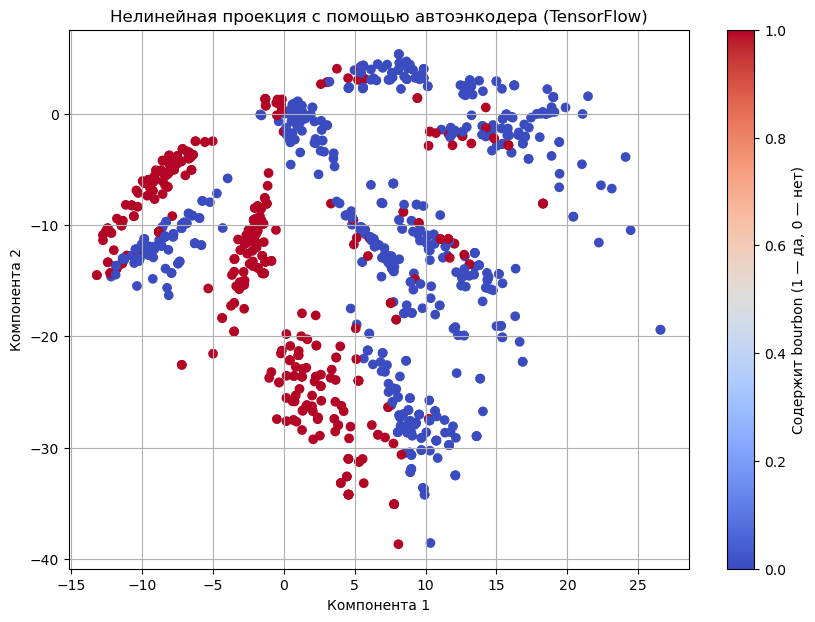

In [694]:

labels = np.where(purchase_matrix['bourbon'] > 0, 1, 0)


plt.figure(figsize=(10, 7))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels,cmap='coolwarm', marker='o')
plt.colorbar(label='Содержит bourbon (1 — да, 0 — нет)')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.title('Нелинейная проекция с помощью автоэнкодера (TensorFlow)')
plt.grid(True)
plt.show()


c:\Users\aiksi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


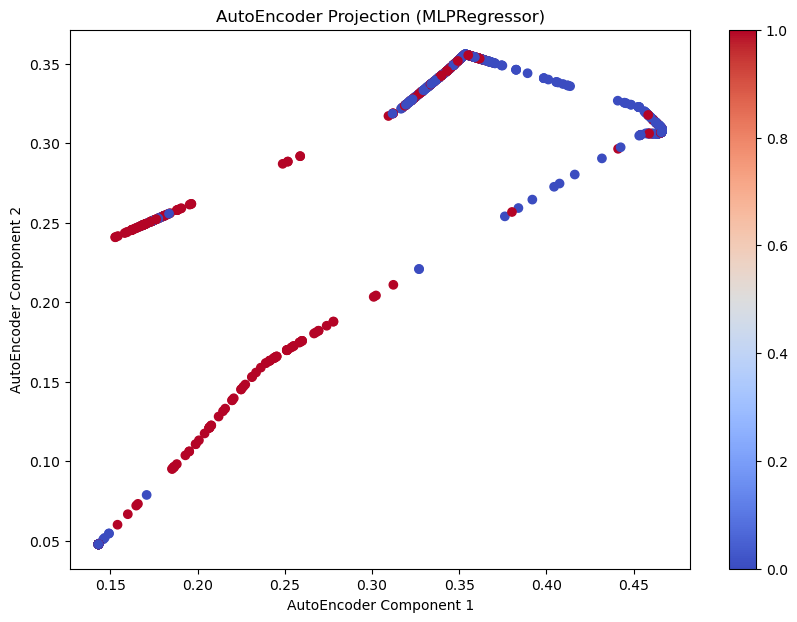

array([[0.44112939, 0.29649078],
       [0.32540071, 0.32955554],
       [0.38264287, 0.34621455],
       ...,
       [0.18363864, 0.25571764],
       [0.14917115, 0.05455556],
       [0.45839179, 0.31777027]])

In [755]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(32,16,2,16, 32), activation='relu', max_iter=100,validation_fraction=0.2,shuffle=True,solver='adam')
mlp.fit(purchase_matrix, purchase_matrix) 

encoded_data = mlp.predict(purchase_matrix)[:, :2]

plt.figure(figsize=(10, 7))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=labels,cmap='coolwarm')
plt.xlabel('AutoEncoder Component 1')
plt.ylabel('AutoEncoder Component 2')
plt.title('AutoEncoder Projection (MLPRegressor)')
plt.colorbar()
plt.show()
encoded_data


PCA – быстрый и простой метод, но работает только с линейными зависимостями. AutoEncoder – сложнее, но ловит нелинейные связи и может лучше выделять скрытые структуры. Если данные простые, PCA хватит. Если есть сложные зависимости, AutoEncoder может дать более четкую группировку.

#### 10.  Из исходной матрицы (из пункта 7) согласно вашему варианту отберите указанное число независимых переменных с использованием заданного метода.

In [696]:
compressed = encoder.predict(purchase_matrix)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [697]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Кластеризация
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(compressed)

# Добавим к исходной таблице
purchase_matrix['Cluster'] = clusters


c:\Users\aiksi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


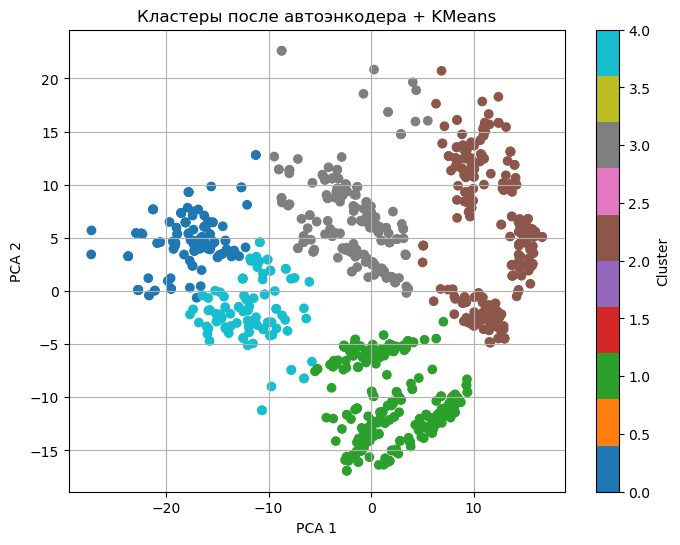

In [698]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compressed)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='tab10')
plt.title('Кластеры после автоэнкодера + KMeans')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [699]:
raw_kmeans = KMeans(n_clusters=5, random_state=42)
raw_clusters = raw_kmeans.fit_predict(purchase_matrix.drop('Cluster', axis=1))

purchase_matrix['Raw_Cluster'] = raw_clusters

from sklearn.metrics import silhouette_score

score_encoded = silhouette_score(compressed, clusters)
score_raw = silhouette_score(purchase_matrix.drop(['Cluster', 'Raw_Cluster'], axis=1), raw_clusters)

print(f"Silhouette после автоэнкодера: {score_encoded:.4f}")
print(f"Silhouette без автоэнкодера: {score_raw:.4f}")


Silhouette после автоэнкодера: 0.4760

c:\Users\aiksi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(



Silhouette без автоэнкодера: 0.1959


In [700]:
corr_matrix = cov2corr(np.cov(purchase_matrix.T))

linkage_matrix = linkage(corr_matrix, method='ward')
clusters = fcluster(linkage_matrix, t=4, criterion='maxclust')

selected_features = []
for i in range(1, 5):
    selected_features.append(np.where(clusters == i)[0][0])

print("Выбранные переменные:", selected_features)

Выбранные переменные: [9, 1, 0, 5]
